In [1]:
import pandas as pd
import numpy as np

In [2]:
from tg.datasets import DatasetFactoryLookupCallback
from tg.model_interactor import ModelInteractor
from tg.splitters import AnchoredSplitter

In [3]:
dataset_name = 'AIR_PASSENGERS'
data_factory = DatasetFactoryLookupCallback(dataset_name=dataset_name)

In [4]:
model_name = 'NAIVE'
params = {'constant': 0.0}

In [5]:
y, X = data_factory(model_name=model_name)

mi = ModelInteractor(model_name=model_name)
mi.load(y=y,
        X=X,
        dataset_name=data_factory.dataset_name,
        timesteps=data_factory.dataset.period,
        train_size=data_factory.dataset.train_size)

trains, test = mi.split_trains_test(
    y=mi.y,
    splitter_class=AnchoredSplitter,
    splitter_args={'min_train_points': data_factory.dataset.train_size},
    X=mi.X)

preds = mi.fit_predict(trains=trains, test=test, parameters=params)
metrics = mi.evaluate(preds=preds, test=test)

100%|██████████| 34/34 [00:00<?, ?it/s]


In [6]:
metrics

{'rmse': 51.61566109804499,
 'smape': 5.057929725683542,
 'mape': 10.17384335225903,
 'mae': 44.05882352941177}

In [7]:
from tg.models import STLModel

In [9]:
stl = STLModel(**{
    'low_pass_deg': 1,
    'low_pass_jump': 7,
    'robust': False,
    'seasonal': 15,
    'seasonal_deg': 1,
    'seasonal_jump': 6,
    'trend_deg': 1,
    'trend_jump': 9
})
stl.fit(y=mi.y, timesteps=data_factory.dataset.period)

In [10]:
stl.predict_one_ahead()

array([455.10196944])

In [11]:
stl.get_residuals()

0     -0.601292
1     -5.391391
2     -4.433561
3      0.501359
4     -0.792532
         ...   
139   -6.783488
140   -2.776613
141    6.389151
142   -4.644024
143   -2.813933
Length: 144, dtype: float64

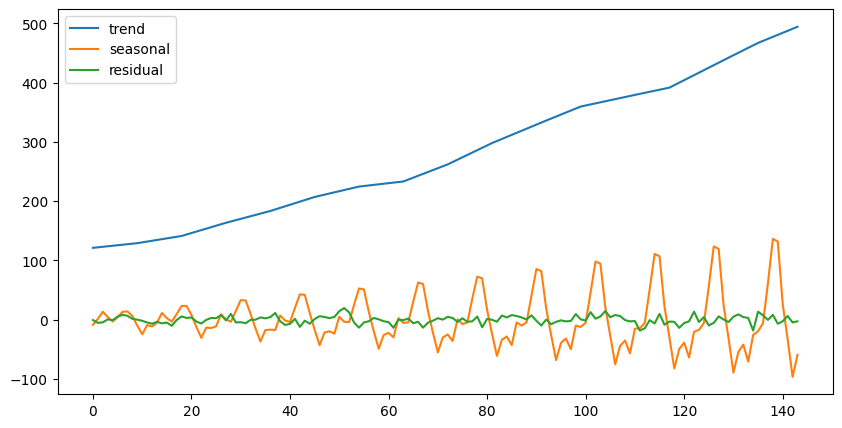

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(stl.get_trend(), label='trend')
plt.plot(stl.get_seasonal(), label='seasonal')
plt.plot(stl.get_residuals(), label='residual')
plt.legend()
plt.show()

In [13]:
from skelm import ELMRegressor

In [16]:
elm = ELMRegressor(n_neurons=10, ufunc='sigmoid')

In [18]:
elm.fit(X=mi.y)

ValueError: estimator requires y to be passed, but the target y is None

In [14]:
y, X = data_factory(model_name='RNN')

In [ ]:
from tg.models import ELMModel

In [ ]:
elm = ELMModel(alpha=1.0, n_neurons=100)
elm.fit(X=X, y=y)
elm.predict_one_ahead()

In [ ]:
1e-5 * 10

In [ ]:
one_ahead_input, X = X.iloc[-1].values.reshape(1, -1), X.iloc[:-1]

In [ ]:
elm = ELMRegressor(n_neurons=100, ufunc='tanh', alpha=0.1)
elm.fit(X=X, y=y)

In [ ]:
elm.predict(X=one_ahead_input)

In [ ]:
y